# EDA and preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. EDA and visualisation

In [2]:
data = pd.read_csv('../data/data.csv')
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.shape

(4600, 18)

We don't have any null values, the dataset is clean.
The only preprocessing that we need to do is encoding object values to numerical values

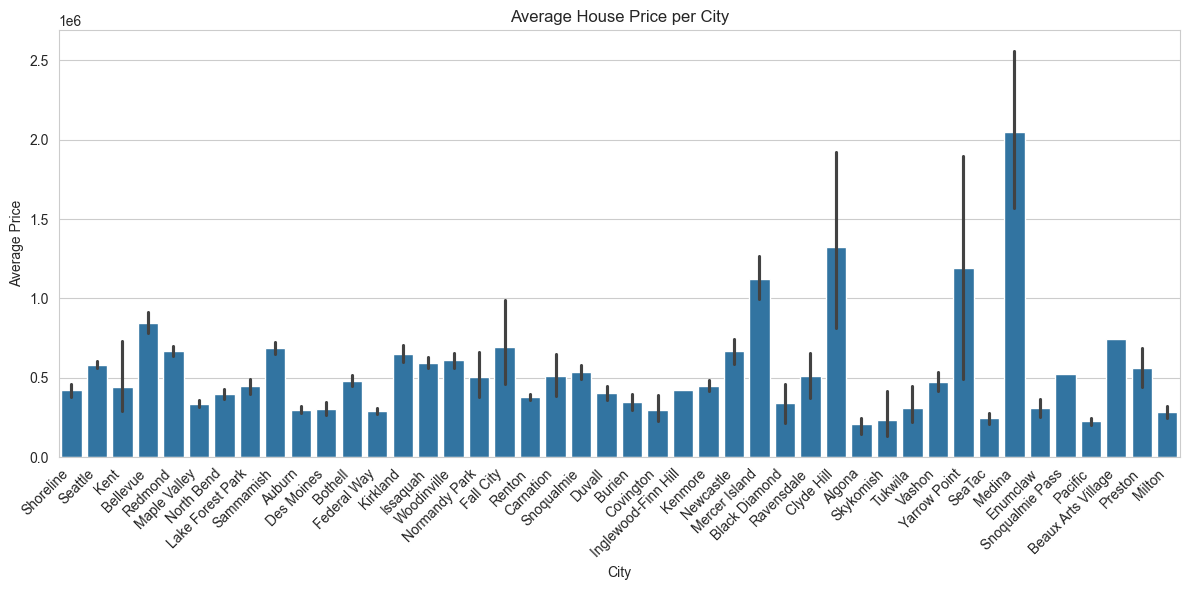

In [5]:
# Visualize average price per city

plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    data=data,
    estimator=np.mean
)
plt.xticks(rotation=45, ha="right")
plt.title("Average House Price per City")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


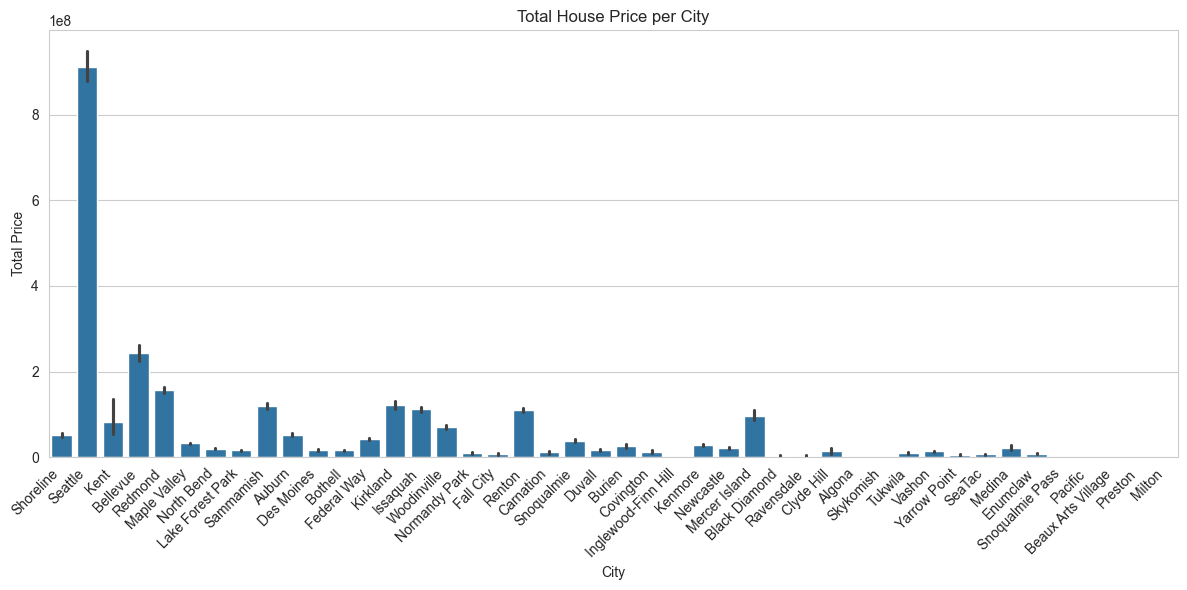

In [6]:
# Visualize total price per city
plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    data=data,
    estimator=np.sum
)
plt.xticks(rotation=45, ha="right")
plt.title("Total House Price per City")
plt.xlabel("City")
plt.ylabel("Total Price")
plt.tight_layout()
plt.show()


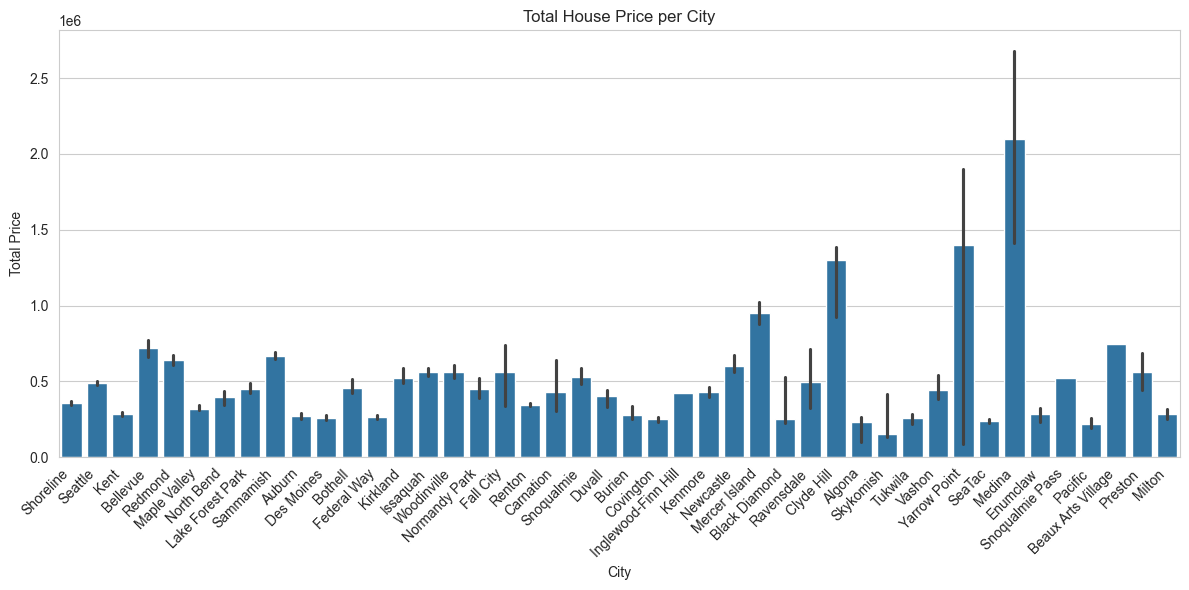

In [7]:
# Visualize total price per city
plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    data=data,
    estimator=np.median
)
plt.xticks(rotation=45, ha="right")
plt.title("Total House Price per City")
plt.xlabel("City")
plt.ylabel("Total Price")
plt.tight_layout()
plt.show()


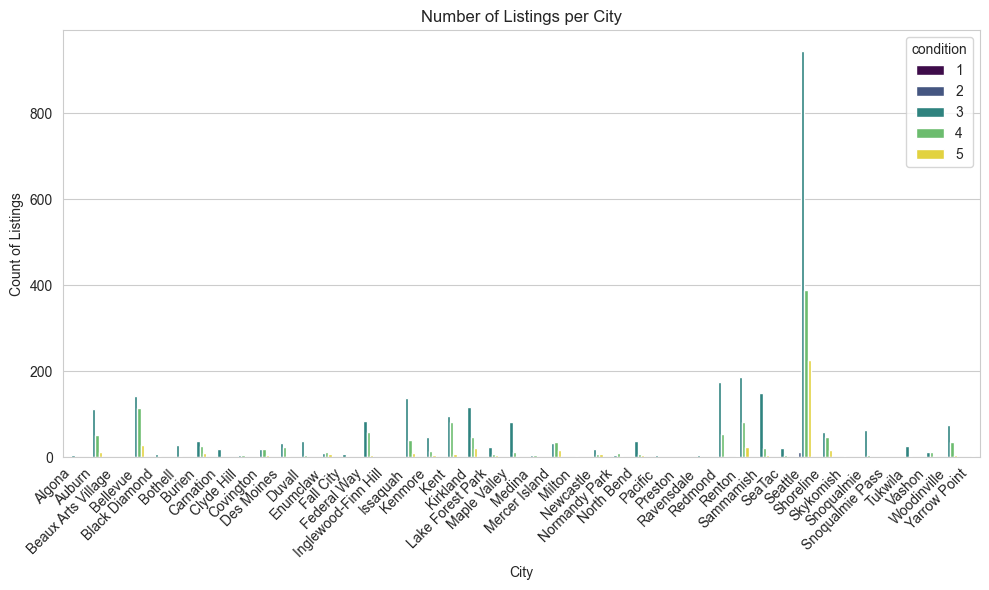

In [8]:
plt.figure(figsize=(10, 6))

city_cond = (
    data
    .groupby(["city", "condition"])
    .size()
    .reset_index(name="count")
)

sns.barplot(
    x="city",
    y="count",
    hue="condition",
    data=city_cond,
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Number of Listings per City")
plt.xlabel("City")
plt.ylabel("Count of Listings")
plt.tight_layout()
plt.show()


<Axes: xlabel='price', ylabel='bedrooms'>

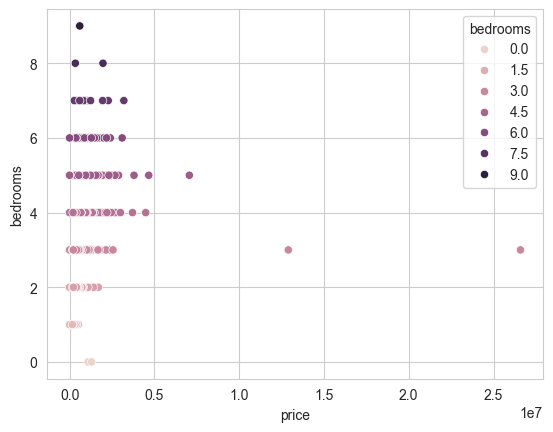

In [9]:
sns.scatterplot(x="price", y="bedrooms", data=data, hue="bedrooms")

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns
#
#
# melted = data.melt(
#     id_vars="price",
#     value_vars=top_features,
#     var_name="feature",
#     value_name="value"
# )
#
# g = sns.FacetGrid(
#     melted,
#     col="feature",
#     col_wrap=1,
#     height=4,
#     sharex=False
# )
#
# g.map(
#     sns.regplot,
#     "value", "price",
#     scatter_kws={"alpha":0.6},
#     line_kws={"color":"red"}
# )
#
# g.set_axis_labels("", "price")
# g.set_titles("{col_name}")
#
# # Tidy up spacing
# g.fig.tight_layout(w_pad=1.0, h_pad=1.2)
# plt.show()


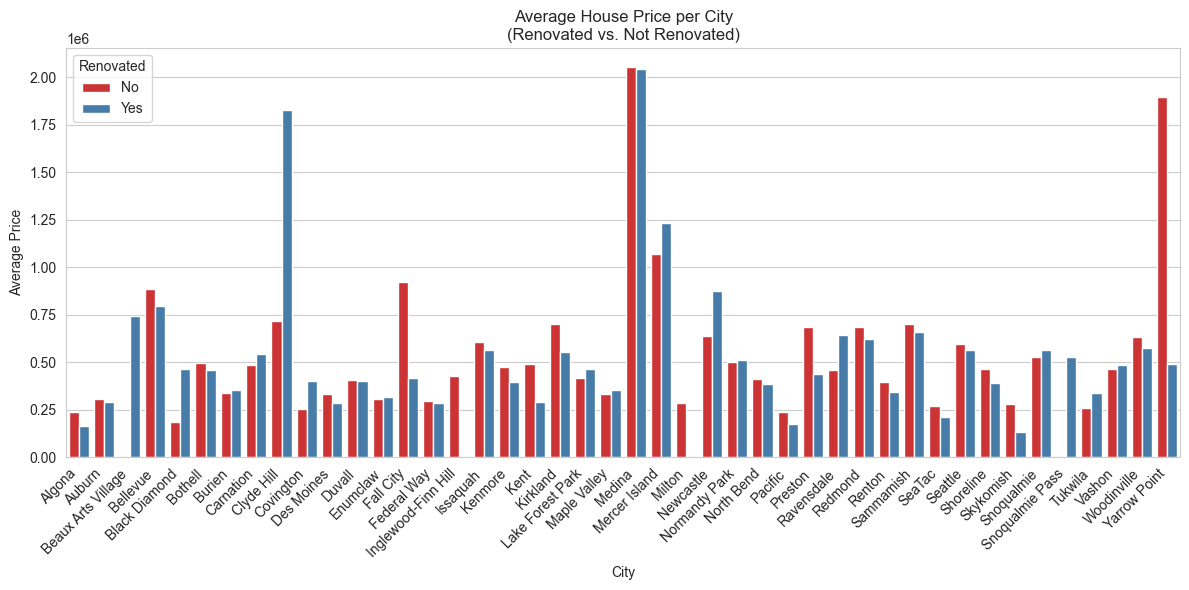

In [11]:
data_copy = data.copy()

data_copy["renovated"] = data_copy["yr_renovated"].apply(lambda yr: "Yes" if yr > 0 else "No")

avg_price = (
    data_copy
    .groupby(["city", "renovated"])["price"]
    .mean()
    .reset_index()
)

# 3) Plot it
plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    hue="renovated",
    data=avg_price,
    palette="Set1",
)
plt.xticks(rotation=45, ha="right")
plt.title("Average House Price per City\n(Renovated vs. Not Renovated)")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.legend(title="Renovated")
plt.tight_layout()
plt.show()


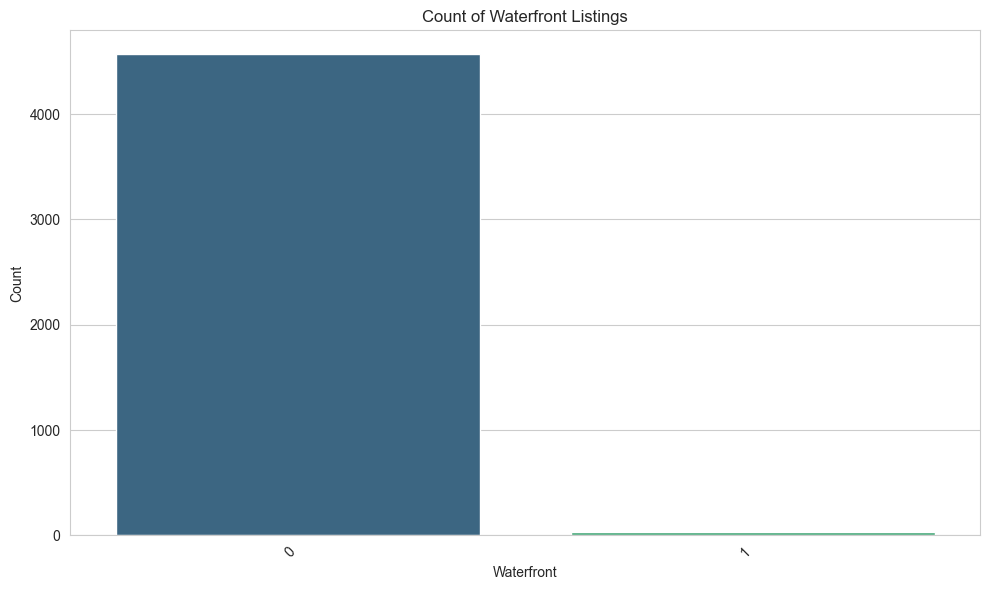

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="waterfront",
    hue="waterfront",
    data=data,
    order=data["waterfront"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45, ha="right")
plt.title("Count of Waterfront Listings")
plt.xlabel("Waterfront")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 2. Feature engineering

In [14]:
current_year = 2014

data['years_since_reno'] = data.apply(
    lambda row: current_year - row['yr_renovated']
    if row['yr_renovated'] > 0
    else current_year - row['yr_built'],
    axis=1
)

## 3. Preprocessing

In [15]:
# Before feature modification
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,years_since_reno
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,9
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,22


In [16]:
data = data.drop('yr_renovated', axis=1)
data = data.drop('country', axis=1)
data = data.drop('street', axis=1)
data = data.drop('date', axis=1)
data = data.drop('waterfront', axis=1)
to_drop = data.index[data["price"] > 10_000_000]
data = data.drop(index=to_drop)

In [17]:
# After feature modification
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,city,statezip,years_since_reno
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,Shoreline,WA 98133,9
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,Seattle,WA 98119,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,Kent,WA 98042,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,Bellevue,WA 98008,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,Redmond,WA 98052,22


### Encoding

In [ ]:
#TODO Implement encoding here

### Correlation Matrix

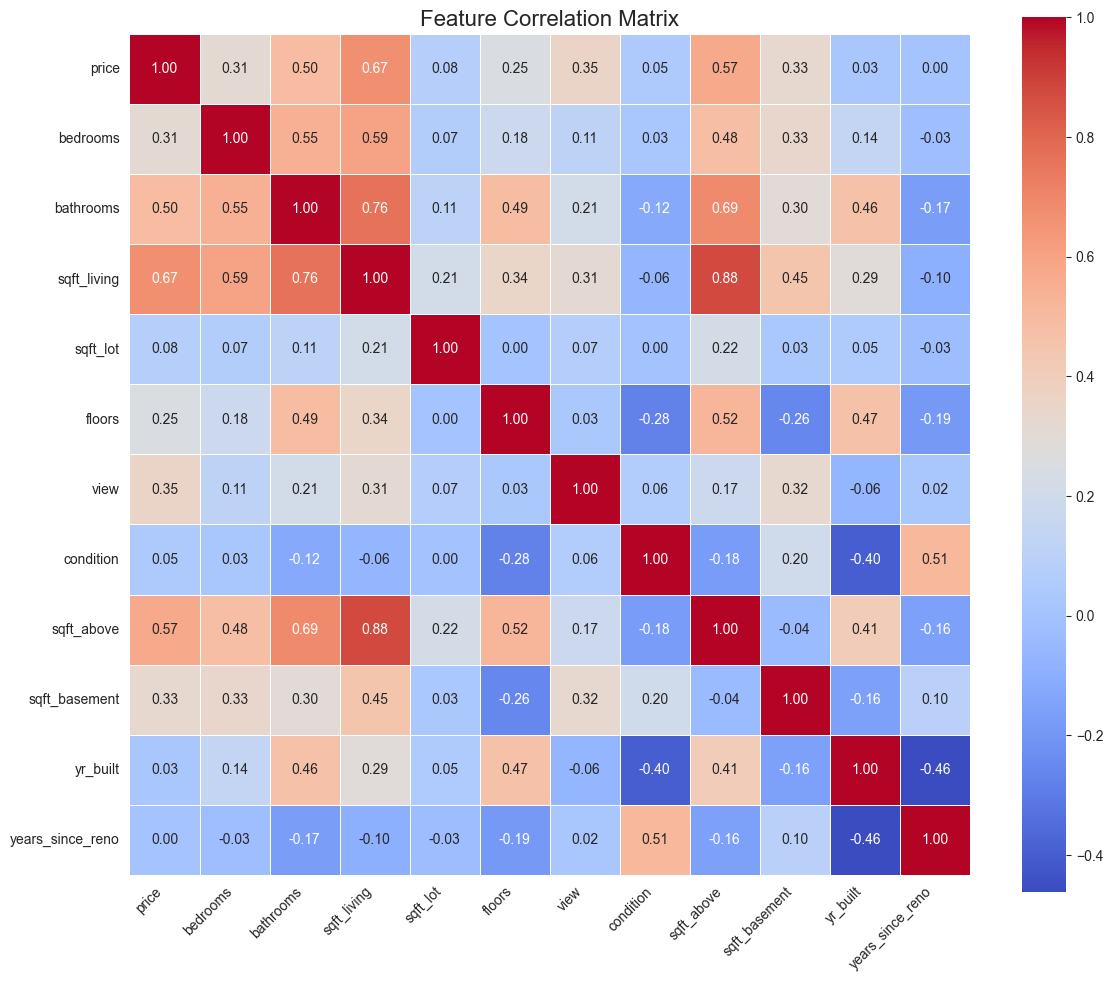

In [21]:
data_correlation = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    data_correlation,
    annot=True,        # show the correlation numbers
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",   # diverging color map
    square=True,       # make cells square
    linewidths=0.5     # lines between cells
)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Sort the features by correlation with 'price'

In [29]:
corr_with_price = data_correlation["price"].abs().sort_values(ascending=False)

top_features = corr_with_price.index.tolist()

i = 0
for feature in top_features:
    print(feature + ": " + str(i))
    i = i + 1


price: 0
sqft_living: 1
sqft_above: 2
bathrooms: 3
view: 4
sqft_basement: 5
bedrooms: 6
floors: 7
sqft_lot: 8
condition: 9
yr_built: 10
years_since_reno: 11
